# Cours3 - Regles d'association

Les regles d'associations et l'algorithme a priori ont deja ete vu, plus en profondeur, dans le cours `Introduction a l'exploitation de donnees` du micro-programme en *Exploitation de donnees*. (francisation de *data mining*)

## Probabilites

- Probabilite

La probabilite de 'X', c'est la proportion de 'X' dans la population(echantillon).

$$ P(A) = \frac {nombre de A}{n} $$

- Probabilite conjointe ('et')

![conditionnelle](prob1.jpg)

$$ P(AetB) = \frac {AetB}{n} $$

- Probabilite conditionnelle



$$ P(A|B) = \frac {P(A et B)}{P(B)} $$

Le pipe '|' ce dit officiellement "*sachant*" tel que "Probabilite de A *sachant* B". 

Ma facon de comprendre est de dire "*dans les*" tel que "Probabilite de A *dans les* B". Ca fait reference aux diagrammes de Venn utilise en probabilite.

- Independance

L'independance signifie que l'une et l'autre des variable ne s'influencent pas. Leur probabilites ne changent pas qu'on considere un groupement ou l'autre.

$$ P(A|B) = P(A) et P(B|A) = P(B) $$

## Vocabulaire 
Voici les termes employes dans les regles d'association. 

$$ Antecedent => Consequent $$

### Frequence
Represente le nombre de X dans l'echantillon.

$$ Frequence = nb. occurences$$

### Support (individuel)
Represente la frequence relativement a l'echantillon. 

$$ Support(X) = \frac {frequence}{total} $$


### Support de la regle

#### Explication
Represente la probabilite conjointe de X et Y. $P(XetY)$

#### Formule
$$ Support(X=>Y) = \frac {XetY}{total} $$

#### Interpretation

### Confiance
#### Explication
#### Formule
$$ Confiance(X=>Y) = \frac{support(X=>Y)}{support(X)} $$

#### Interpretation


### Lift
#### Explication
#### Formule
$$ Lift(X=>Y) = \frac{Confiance(X=>Y)}{Support(Y)}$$

#### Interpretation


In [2]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("donnees\\30-650-boulangerie-DATA.xlsx")

In [4]:
df.head()

,No_reçu,weekend,no_succursale,ville,etat,gâteau chocolat,gâteau citron,gâteau fraises,tarte pommes,tarte bleuets,...,croissant chocolat,limonade citron,limonade framboise,jus d'orange,thé vert,café,chocolat chaud,cappuccino,soda aux cerises,espresso
0,5952331,0,14,Seattle,WA,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9643546,0,8,Santa Barbara,CA,0,1,0,1,0,...,0,0,0,0,0,0,1,1,0,0
2,1981570,1,15,Olympia,WA,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9083533,0,11,Sacramento,CA,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7376329,0,15,Olympia,WA,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df2 = df.drop(columns=['No_reçu','weekend','no_succursale','ville','etat'])
df2.head()

,gâteau chocolat,gâteau citron,gâteau fraises,tarte pommes,tarte bleuets,tarte chocolat,tarte cerises,tarte citron,tarte pacanes,biscuit ganache,...,croissant chocolat,limonade citron,limonade framboise,jus d'orange,thé vert,café,chocolat chaud,cappuccino,soda aux cerises,espresso
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Apriori demo

Nous calculons la frequence (**le support individuel**) des items et leurs support puis nous affichons les TOP 3 concernant le support, donc les 3 items les plus populaire. Nous allons ensuite valider si le calcul est le meme qu'avec le gabarit excel.

In [ ]:
freq_items = apriori(df2, min_support=0.0002, use_colnames=True, verbose=1)
print(freq_items.sort_values(by=['support'],ascending=False).head(3))

Processing 56248 combinations | Sampling itemset size 4

### Validation avec le fichier excel

![validation](asso_check.png)

Nous avons bien les memes supports pour les Top items

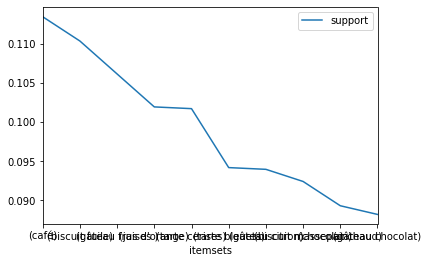

In [37]:
freq_items.sort_values(by=['support'],ascending=False).head(10).plot(x='itemsets',y='support')

In [23]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(soda aux cerises, croissant pommes)",(tarte pommes),0.027858,0.081141,0.025426,0.912698,11.248324,0.023165,10.525114
1,"(soda aux cerises, tarte pommes)",(croissant pommes),0.028079,0.082025,0.025426,0.905512,11.039434,0.023122,9.715233
2,"(croissant pommes, tarte pommes)",(soda aux cerises),0.034933,0.074066,0.025426,0.727848,9.827036,0.022838,3.402270
3,"(limonade framboise, café)",(tarte bleuets),0.002653,0.094185,0.001769,0.666667,7.078247,0.001519,2.717444
4,"(tarte chocolat, biscuit noix)",(cappuccino),0.031616,0.081141,0.029405,0.930070,11.462415,0.026840,13.139686
